In [37]:
from openparticle import *
import matplotlib.pyplot as plt
import numpy as np

# Static Yukawa Hamiltonian:

$H = E_f b^\dagger b + E_b a^\dagger a + gE_I b^\dagger (a^\dagger + a)b$

RGPEP Equation:

$\frac{d}{dt}H(t) = [\mathcal{G}_t, H(t)]$

$\mathcal{G}_t = [H_f + H_b, H(t)]$

$H(t) = E_f(t)b^\dagger b + E_b(t) a^\dagger a + g(t)E_I b^
\dagger (a^\dagger + a)b \rightarrow \frac{d}{dt}H(t)= [\mathcal{G}_t, H(t)]$

$\dot{E}_f b^\dagger b + \dot{E}_b(t) a^\dagger a + \dot{g(t)}E_I b^
\dagger (a^\dagger + a)b = [\mathcal{G}_t, E_f(t)b^\dagger b+ E_b(t) a^\dagger a + g(t)E_I b^
\dagger (a^\dagger + a)b]$

In [70]:
Ef, Eb, Ei = 1, 1, 1
g0 = 10
max_bose_occ = 200

In [71]:
H0 = Ef * ParticleOperator('b0^ b0') + Eb * ParticleOperator('a0^ a0')
Hi = g0 * Ei * (ParticleOperator('b0^') * (
    ParticleOperator('a0^') + ParticleOperator('a0')
    )*ParticleOperator('b0') )
Hcan = H0 + Hi

In [72]:
Gt = H0.commutator(Hcan)
Gt

10 * b0^ b0 a0^
-10 * b0^ b0 a0

In [73]:
rhs = Gt.commutator(Hcan)

In [74]:
rhs

-10 * b0^ b0 a0^
-10 * b0^ b0 a0
-200 * b0^ b0
200 * b0^ b0^ b0 b0

From the RGPEP equation, we see:

$\dot{E}_f(t) b^\dagger b + \dot{g}(t)E_I b^\dagger(a^\dagger + a)b = -g(t)E_b^2E_Ib^\dagger(a^\dagger + a)b - 2g^2(t)E_bE_I^2b^\dagger b$

Thus,

\begin{cases}
\dot{E}_f(t) = -2g^2(t)E_bE_I^2 \\
\dot{g}(t) = -g(t)E_b^2

\end{cases}

The second equation implies $g(t) = ge^{-E_b^2t}$. Plugging this into the first equation gives $\dot{E}_f(t) = -2g^2e^{-2E_b^2t}E_bE_I^2$. Solving this separable ODE gives: 

$E_f(t) - E_f = -2g^2E_bE_I^2\int_0^t dt e^{-2E_b^2t}$

$\implies E_f(t) = E_f + g^2(1 - e^{-2E_b^2})E_I^2/E_b$

Thus, 

$$H(t) = [E_f + g^2(1 - e^{-2E_b^2t})E_I^2/E_b]b^\dagger b + E_b a^\dagger a + ge^{-2E_bt}E_I b^\dagger (a^\dagger + a)b$$

In [75]:
def g(t):
    return g0 * np.exp(-Eb**2 * t)

def Delta(t):
    return (1 - np.exp(2 * Eb**2 * t)) * Eb**2 / Ei

In [76]:
def H(t):
    return (Ef + g(t)**2 * Delta(t)) * ParticleOperator('b0^ b0')+\
    Eb * ParticleOperator('a0^ a0') +\
    g(t) * Ei * (ParticleOperator('b0^') * (
    ParticleOperator('a0^') + ParticleOperator('a0')
    )*ParticleOperator('b0') )

In [77]:
f = Fock([0], [], [])
# b = [Fock([], [], [(0, i)]) for i in range(max_bose_occ)]
interact = [Fock([0], [], [(0, i)]) for i in range(1, max_bose_occ)]

In [78]:
basis = [f] + interact

In [79]:
Hmat_t0 = generate_matrix(H(0), basis)

Text(0.5, 1.0, '$E_0 = -99.00000000000006$')

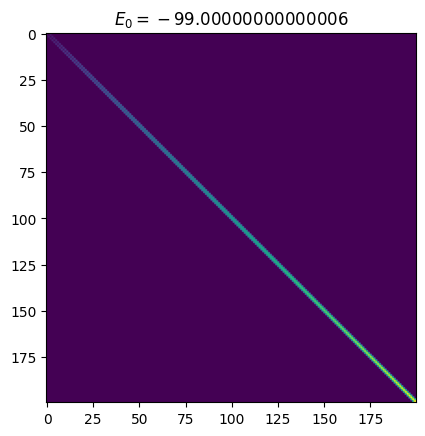

In [80]:
plt.imshow(Hmat_t0)
plt.title(f"$E_0 = {min(np.linalg.eigvalsh(Hmat_t0))}$" )

In [81]:
vals, _ = np.linalg.eigh(generate_matrix(H(0), basis))
min(vals)

-99.00000000000003

-98.96645373720973 * b0^ b0
1.0 * a0^ a0
0.1831563888873418 * b0^ a0^ b0
0.1831563888873418 * b0^ a0 b0

E_0: -98.99999979818934


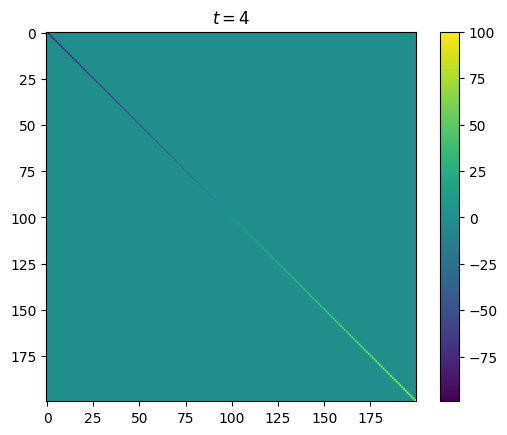

In [86]:
t = 4
print(H(t))
Hmat_t = generate_matrix(H(t), basis)
plt.imshow(Hmat_t)
plt.colorbar()
plt.title(f'$t = {t}$')
vals_t, vecs_t = np.linalg.eigh(Hmat_t[:4, :4])
print("E_0:", min(vals_t)) #(vals_t10[vals_t10 > 0].min()))

E0:  -98.99999979818934


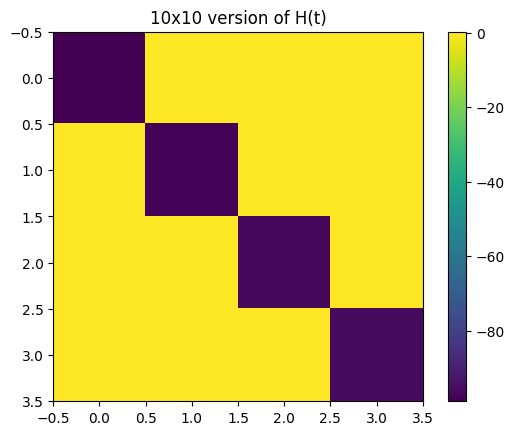

In [88]:
plt.imshow(Hmat_t[:4, :4])
plt.colorbar()
plt.title("10x10 version of H(t)")
print("E0: ", min(np.linalg.eigvalsh(Hmat_t[:4, :4])))
plt.show()

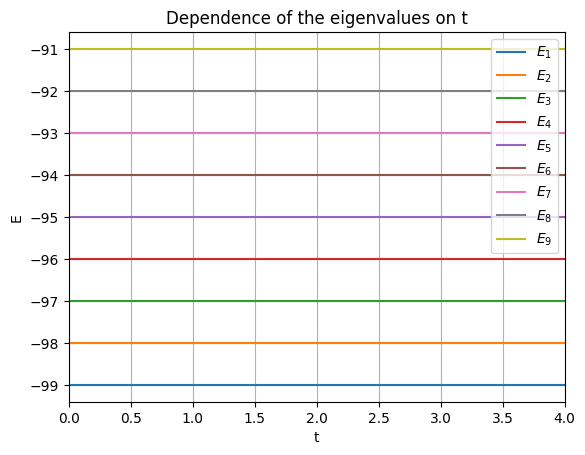

In [89]:
t_tab = np.linspace(0, 4, 201)
y_tab_t = [np.linalg.eigvalsh(generate_matrix(H(t_), basis)) for t_ in t_tab]

# Disable LaTeX rendering
plt.rcParams.update({"text.usetex": False})

for i in range(9):
    plt.plot(t_tab, [y[i] for y in y_tab_t], label=f'$E_{i+1}$')


plt.xlabel('t')
plt.ylabel('E')
plt.title('Dependence of the eigenvalues on t')
plt.grid()
plt.xlim(np.min(t_tab), np.max(t_tab))
plt.legend()
plt.show()

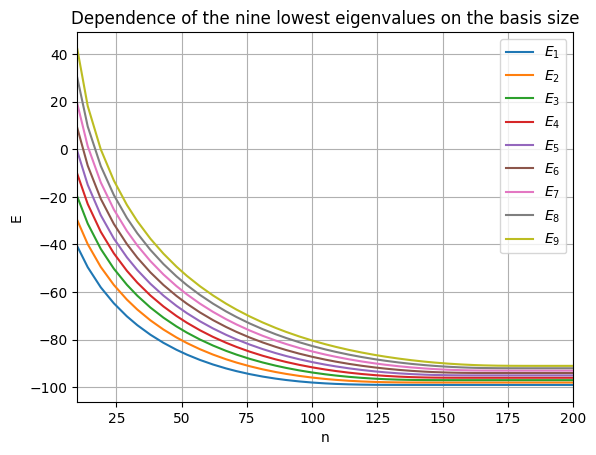

In [90]:
import numpy as np
import matplotlib.pyplot as plt

n_tab = np.linspace(10, max_bose_occ, 41, dtype=int)
y_tab_n = [np.linalg.eigvalsh(generate_matrix(H(0), [f] + [Fock([0], [], [(0, i)]) for i in range(1, n_)]))[:10] for n_ in n_tab]

# Disable LaTeX rendering
plt.rcParams.update({"text.usetex": False})

# Plot each of the ten lowest eigenvalues separately
for i in range(9):
    plt.plot(n_tab, [y[i] for y in y_tab_n], label=f'$E_{i+1}$')

plt.xlabel('n')
plt.ylabel('E')
plt.title('Dependence of the nine lowest eigenvalues on the basis size')
plt.grid()
plt.xlim(np.min(n_tab), np.max(n_tab))
plt.legend()
plt.show()


In [91]:
H(4).op_dict

{'b0^ b0': -98.96645373720973,
 'a0^ a0': 1.0,
 'b0^ a0^ b0': 0.1831563888873418,
 'b0^ a0 b0': 0.1831563888873418}

In [92]:
H(0).op_dict

{'b0^ b0': 1.0, 'a0^ a0': 1.0, 'b0^ a0^ b0': 10.0, 'b0^ a0 b0': 10.0}